In [24]:
#Logistic Regression with Sigmoid function

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [38]:
#generating data by using make_classification function
x,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1,
                          random_state=41,hypercube=False,class_sep=10)

In [39]:
y



array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

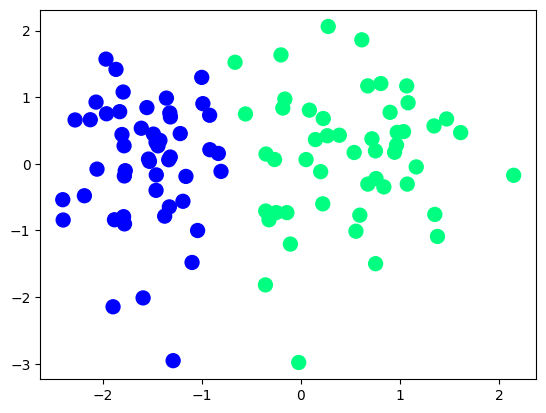

In [40]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [42]:
#using sigmoid fucntion technique instead of setp fucntion, as it will update the performance of the overall prediction

def percepton(x,y):
    x = np.insert(x,0,1,axis=1)  # put a 1 infront of the each and every row
    weights = np.ones(x.shape[1])  #creating a weights array(for all coloumn) of 1's value 
    lr = 0.1  #learning rate 

    for i in range(10000): #epochs=1000
        j = np.random.randint(0,100)   #generating a random row value from 0 to 100
        #in the next line we will do dot product between x value and weights(which is nothing but 1's matrix [1,1,1] {np.ones(x.shape[1])} of 
        #coef and intercept value. 
        y_hat = sigmoid(np.dot(x[j],weights)) #suppose j=41, and x[41] = array[1,3.22,7.22] then dot product will look like ([1,3.22,7.22] . [1,1,1]
        # the step function will return 1 or 0 if positive value then 1 if negative value then 0

        #updating the weights 
        weights = weights + lr*(y[j] - y_hat)*x[j]

    return weights[0],weights[1:]  # it will return weights[0] = intercept value and wights[1:] = all the eoeficients value




In [43]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [44]:
intercept_, coef_ = percepton(x,y)

In [45]:
print(coef_)
print(intercept_)

[9.02360994 0.53792437]
5.893862971280293


In [46]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
print(m)
print(b)

-16.77486739671074
-10.956675925210178


In [47]:
x_input=np.linspace(-3,3,100) 
y_input = m*x_input + b 

(-3.0, 2.0)

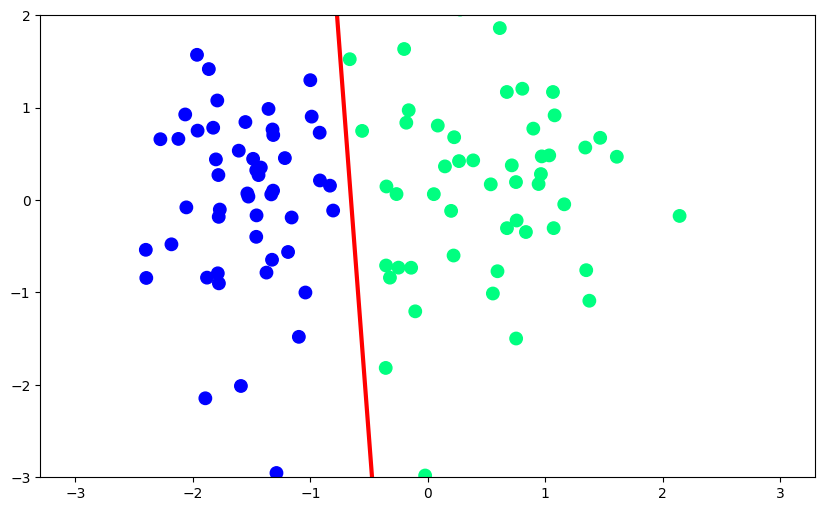

In [49]:
# we will see the line is more accurate than the percepton technique the line is more perfectly divided the whole data set, so
#this sigmoid fucntion is better than the percepton but there is still room for some upgradation so our fuction will work like 
#the actual Regression built in model of scikit learn libary
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=80)
plt.ylim(-3,2)